# SVM Model

### Import python libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

### Import the data

In [2]:
# Set variable for the data
movies = pd.read_csv("Resources/imdb_final.csv")
movies.head()

,imdb_title_id,title,year,genre,duration,country,director,production_company,budget,total_votes,...,allover45,males,males18to29,males30to44,malesover45,females,females18to29,females30to44,femalesover45,rating_class
0,tt0035423,Kate & Leopold,2001,Comedy,118,USA,James Mangold,Konrad Pictures,48000000,75298,...,6.4,6.3,6.5,6.2,6.3,6.6,6.7,6.4,6.7,Good
1,tt0113026,The Fantasticks,2000,Musical,86,USA,Michael Ritchie,Michael Ritchie Productions,10000000,1082,...,5.4,5.3,5.4,5.4,5.3,5.7,5.6,5.8,5.6,Good
2,tt0118589,Glitter,2001,Drama,104,USA,Vondie Curtis-Hall,Twentieth Century Fox,22000000,20959,...,2.1,1.9,2.1,1.9,2.0,2.9,3.2,2.7,2.5,Bad
3,tt0118652,The Attic Expeditions,2001,Comedy,100,USA,Jeremy Kasten,Tse Tse Fly Productions,1000000,1588,...,4.6,5.0,4.7,5.1,4.6,4.8,5.8,4.6,4.6,Good
4,tt0120467,Vulgar,2000,Crime,87,USA,Bryan Johnson,Chango Productions,120000,3852,...,5.0,5.3,6.1,5.3,5.1,5.2,5.2,5.3,4.6,Good


#### Clean data for SVM model

 For this model we will not be using the following columns: imdb_title_id, title, country, production company,
 total_votes, median_vote, all18to29, all30to44, allover45, males, males18to29, males30to44, malesover45, females,
 females18to29, females30to44, and femalesover45.

 Keeping: year, genre, duration, director, budget, and rating_class.

In [3]:
# Drop columns using pandas and display new DataFrame.
new_df = movies.drop(columns=['imdb_title_id', 'title', 'country', 'production_company', 'total_votes', 'median_vote',
                      'all18to29', 'all30to44', 'allover45', 'males', 'males18to29', 'males30to44', 'malesover45',
                      'females', 'females18to29', 'females30to44', 'femalesover45'])
new_df

,year,genre,duration,director,budget,rating_class
0,2001,Comedy,118,James Mangold,48000000,Good
1,2000,Musical,86,Michael Ritchie,10000000,Good
2,2001,Drama,104,Vondie Curtis-Hall,22000000,Bad
3,2001,Comedy,100,Jeremy Kasten,1000000,Good
4,2000,Crime,87,Bryan Johnson,120000,Good
...,...,...,...,...,...,...
5055,2019,Comedy,84,Jon Lucas,5000000,Excellent
5056,2019,Drama,94,Dan Sallitt,95000,Good
5057,2019,Action,84,Glenn Miller,100000,Bad
5058,2019,Action,92,Keoni Waxman,3000000,Good


### View the data using seaborn.pairplot

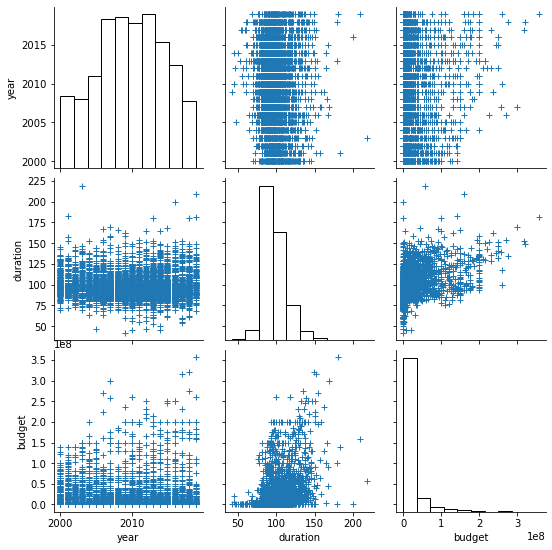

In [4]:
# Set marker to + for easier viewing
sns.pairplot(
    new_df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [5]:
# Set up dependent variable
target = new_df["rating_class"]
target_names = ["Bad", "Good", "Excellent"]

In [6]:
# Drop dependent variable from DataFrame
data = new_df.drop("rating_class", axis=1)
feature_names = data.columns
data.head()

,year,genre,duration,director,budget
0,2001,Comedy,118,James Mangold,48000000
1,2000,Musical,86,Michael Ritchie,10000000
2,2001,Drama,104,Vondie Curtis-Hall,22000000
3,2001,Comedy,100,Jeremy Kasten,1000000
4,2000,Crime,87,Bryan Johnson,120000


In [7]:
# Binary encode list columns
data_binary_encoded = pd.get_dummies(data, columns= ["genre", "director"])
data_binary_encoded

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,86,10000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,104,22000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2001,100,1000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,87,120000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,2019,84,5000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5056,2019,94,95000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5057,2019,84,100000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5058,2019,92,3000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, target, random_state=42, stratify= target)

In [9]:
# Scale the independent variables
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [10]:
# Set up the model using a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
# Print model accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.689


In [12]:
# Calculate classification report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.57      0.44      0.50       270
        Good       0.46      0.13      0.20       167
   Excellent       0.72      0.88      0.80       828

    accuracy                           0.69      1265
   macro avg       0.59      0.49      0.50      1265
weighted avg       0.66      0.69      0.65      1265

